In [1]:
!pip install -q diffusers transformers accelerate safetensors torch pillow


In [2]:
import torch
from diffusers import StableDiffusionPipeline
import os
from PIL import Image
import matplotlib.pyplot as plt


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [3]:
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [4]:
output_dir = "synthetic_images"
os.makedirs(output_dir, exist_ok=True)


In [5]:
prompts = [
    "A beautiful sunset over the mountains",
    "A futuristic city at night",
    "A cute puppy playing in the park",
    "An astronaut riding a horse on Mars",
    "A realistic portrait of a woman in traditional Indian attire"
]


In [7]:
pipe.enable_attention_slicing()

for i, prompt in enumerate(prompts):
    image = pipe(
        prompt,
        num_inference_steps=20,
        guidance_scale=7.5
    ).images[0]

    image_path = f"{output_dir}/image_{i+1}.png"
    image.save(image_path)
    print(f"Saved {image_path}")


  0%|          | 0/20 [00:00<?, ?it/s]

Saved synthetic_images/image_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved synthetic_images/image_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved synthetic_images/image_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved synthetic_images/image_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved synthetic_images/image_5.png


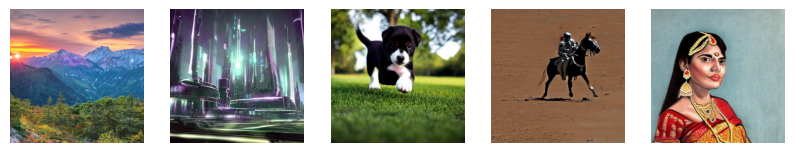

In [8]:
plt.figure(figsize=(10,5))

for i in range(5):
    img = Image.open(f"{output_dir}/image_{i+1}.png")
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")

plt.show()


In [9]:
cat_species = [
    "Persian cat", "Maine Coon cat", "Bengal cat", "Siamese cat",
    "Ragdoll cat", "British Shorthair cat", "Sphynx cat", "Abyssinian cat",
    "Scottish Fold cat", "Birman cat", "Russian Blue cat", "Norwegian Forest cat",
    "Savannah cat", "Oriental Shorthair cat", "Devon Rex cat", "Cornish Rex cat",
    "American Shorthair cat", "Exotic Shorthair cat", "Turkish Angora cat",
    "Turkish Van cat", "Manx cat", "Himalayan cat", "Balinese cat",
    "Bombay cat", "Chartreux cat", "Egyptian Mau cat", "LaPerm cat",
    "Ocicat cat", "Singapura cat", "Tonkinese cat",
    "Somali cat", "Japanese Bobtail cat", "Kurilian Bobtail cat",
    "Selkirk Rex cat", "Snowshoe cat", "Toyger cat",
    "Chausie cat", "Korat cat", "Lykoi cat", "Peterbald cat"
]


In [11]:
base_dir = "cat_dataset"
os.makedirs(base_dir, exist_ok=True)

images_per_species = 10

for species in cat_species:
    species_name = species.replace(" ", "_")
    species_dir = os.path.join(base_dir, species_name)
    os.makedirs(species_dir, exist_ok=True)

    print(f"\nGenerating images for: {species}")

    for i in range(images_per_species):
        prompt = f"A high quality realistic photo of a {species}, professional photography, sharp focus"

        image = pipe(
            prompt,
            num_inference_steps=20,
            guidance_scale=7.5
        ).images[0]

        image_path = f"{species_dir}/{species_name}_{i+1}.png"
        image.save(image_path)

        print(f"Saved {image_path}")



Generating images for: Persian cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Persian_cat/Persian_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Persian_cat/Persian_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Persian_cat/Persian_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Persian_cat/Persian_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Persian_cat/Persian_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Persian_cat/Persian_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Persian_cat/Persian_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Persian_cat/Persian_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Persian_cat/Persian_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Persian_cat/Persian_cat_10.png

Generating images for: Maine Coon cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Maine_Coon_cat/Maine_Coon_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Maine_Coon_cat/Maine_Coon_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Maine_Coon_cat/Maine_Coon_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Maine_Coon_cat/Maine_Coon_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Maine_Coon_cat/Maine_Coon_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Maine_Coon_cat/Maine_Coon_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Maine_Coon_cat/Maine_Coon_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Maine_Coon_cat/Maine_Coon_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Maine_Coon_cat/Maine_Coon_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Maine_Coon_cat/Maine_Coon_cat_10.png

Generating images for: Bengal cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bengal_cat/Bengal_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bengal_cat/Bengal_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bengal_cat/Bengal_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bengal_cat/Bengal_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bengal_cat/Bengal_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bengal_cat/Bengal_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bengal_cat/Bengal_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bengal_cat/Bengal_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bengal_cat/Bengal_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bengal_cat/Bengal_cat_10.png

Generating images for: Siamese cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Siamese_cat/Siamese_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Siamese_cat/Siamese_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Siamese_cat/Siamese_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Siamese_cat/Siamese_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Siamese_cat/Siamese_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Siamese_cat/Siamese_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Siamese_cat/Siamese_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Siamese_cat/Siamese_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Siamese_cat/Siamese_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Siamese_cat/Siamese_cat_10.png

Generating images for: Ragdoll cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ragdoll_cat/Ragdoll_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ragdoll_cat/Ragdoll_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Ragdoll_cat/Ragdoll_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ragdoll_cat/Ragdoll_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ragdoll_cat/Ragdoll_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ragdoll_cat/Ragdoll_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ragdoll_cat/Ragdoll_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ragdoll_cat/Ragdoll_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ragdoll_cat/Ragdoll_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ragdoll_cat/Ragdoll_cat_10.png

Generating images for: British Shorthair cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/British_Shorthair_cat/British_Shorthair_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/British_Shorthair_cat/British_Shorthair_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/British_Shorthair_cat/British_Shorthair_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/British_Shorthair_cat/British_Shorthair_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/British_Shorthair_cat/British_Shorthair_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/British_Shorthair_cat/British_Shorthair_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/British_Shorthair_cat/British_Shorthair_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/British_Shorthair_cat/British_Shorthair_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/British_Shorthair_cat/British_Shorthair_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/British_Shorthair_cat/British_Shorthair_cat_10.png

Generating images for: Sphynx cat


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Sphynx_cat/Sphynx_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Sphynx_cat/Sphynx_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Sphynx_cat/Sphynx_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Sphynx_cat/Sphynx_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Sphynx_cat/Sphynx_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Sphynx_cat/Sphynx_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Sphynx_cat/Sphynx_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Sphynx_cat/Sphynx_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Sphynx_cat/Sphynx_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Sphynx_cat/Sphynx_cat_10.png

Generating images for: Abyssinian cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Abyssinian_cat/Abyssinian_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Abyssinian_cat/Abyssinian_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Abyssinian_cat/Abyssinian_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Abyssinian_cat/Abyssinian_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Abyssinian_cat/Abyssinian_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Abyssinian_cat/Abyssinian_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Abyssinian_cat/Abyssinian_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Abyssinian_cat/Abyssinian_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Abyssinian_cat/Abyssinian_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Abyssinian_cat/Abyssinian_cat_10.png

Generating images for: Scottish Fold cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Scottish_Fold_cat/Scottish_Fold_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Scottish_Fold_cat/Scottish_Fold_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Scottish_Fold_cat/Scottish_Fold_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Scottish_Fold_cat/Scottish_Fold_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Scottish_Fold_cat/Scottish_Fold_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Scottish_Fold_cat/Scottish_Fold_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Scottish_Fold_cat/Scottish_Fold_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Scottish_Fold_cat/Scottish_Fold_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Scottish_Fold_cat/Scottish_Fold_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Scottish_Fold_cat/Scottish_Fold_cat_10.png

Generating images for: Birman cat


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Birman_cat/Birman_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Birman_cat/Birman_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Birman_cat/Birman_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Birman_cat/Birman_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Birman_cat/Birman_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Birman_cat/Birman_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Birman_cat/Birman_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Birman_cat/Birman_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Birman_cat/Birman_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Birman_cat/Birman_cat_10.png

Generating images for: Russian Blue cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Russian_Blue_cat/Russian_Blue_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Russian_Blue_cat/Russian_Blue_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Russian_Blue_cat/Russian_Blue_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Russian_Blue_cat/Russian_Blue_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Russian_Blue_cat/Russian_Blue_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Russian_Blue_cat/Russian_Blue_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Russian_Blue_cat/Russian_Blue_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Russian_Blue_cat/Russian_Blue_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Russian_Blue_cat/Russian_Blue_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Russian_Blue_cat/Russian_Blue_cat_10.png

Generating images for: Norwegian Forest cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Norwegian_Forest_cat/Norwegian_Forest_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Norwegian_Forest_cat/Norwegian_Forest_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Norwegian_Forest_cat/Norwegian_Forest_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Norwegian_Forest_cat/Norwegian_Forest_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Norwegian_Forest_cat/Norwegian_Forest_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Norwegian_Forest_cat/Norwegian_Forest_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Norwegian_Forest_cat/Norwegian_Forest_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Norwegian_Forest_cat/Norwegian_Forest_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Norwegian_Forest_cat/Norwegian_Forest_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Norwegian_Forest_cat/Norwegian_Forest_cat_10.png

Generating images for: Savannah cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Savannah_cat/Savannah_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Savannah_cat/Savannah_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Savannah_cat/Savannah_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Savannah_cat/Savannah_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Savannah_cat/Savannah_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Savannah_cat/Savannah_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Savannah_cat/Savannah_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Savannah_cat/Savannah_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Savannah_cat/Savannah_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Savannah_cat/Savannah_cat_10.png

Generating images for: Oriental Shorthair cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Oriental_Shorthair_cat/Oriental_Shorthair_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Oriental_Shorthair_cat/Oriental_Shorthair_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Oriental_Shorthair_cat/Oriental_Shorthair_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Oriental_Shorthair_cat/Oriental_Shorthair_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Oriental_Shorthair_cat/Oriental_Shorthair_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Oriental_Shorthair_cat/Oriental_Shorthair_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Oriental_Shorthair_cat/Oriental_Shorthair_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Oriental_Shorthair_cat/Oriental_Shorthair_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Oriental_Shorthair_cat/Oriental_Shorthair_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Oriental_Shorthair_cat/Oriental_Shorthair_cat_10.png

Generating images for: Devon Rex cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Devon_Rex_cat/Devon_Rex_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Devon_Rex_cat/Devon_Rex_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Devon_Rex_cat/Devon_Rex_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Devon_Rex_cat/Devon_Rex_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Devon_Rex_cat/Devon_Rex_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Devon_Rex_cat/Devon_Rex_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Devon_Rex_cat/Devon_Rex_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Devon_Rex_cat/Devon_Rex_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Devon_Rex_cat/Devon_Rex_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Devon_Rex_cat/Devon_Rex_cat_10.png

Generating images for: Cornish Rex cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Cornish_Rex_cat/Cornish_Rex_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Cornish_Rex_cat/Cornish_Rex_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Cornish_Rex_cat/Cornish_Rex_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Cornish_Rex_cat/Cornish_Rex_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Cornish_Rex_cat/Cornish_Rex_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Cornish_Rex_cat/Cornish_Rex_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Cornish_Rex_cat/Cornish_Rex_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Cornish_Rex_cat/Cornish_Rex_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Cornish_Rex_cat/Cornish_Rex_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Cornish_Rex_cat/Cornish_Rex_cat_10.png

Generating images for: American Shorthair cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/American_Shorthair_cat/American_Shorthair_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/American_Shorthair_cat/American_Shorthair_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/American_Shorthair_cat/American_Shorthair_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/American_Shorthair_cat/American_Shorthair_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/American_Shorthair_cat/American_Shorthair_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/American_Shorthair_cat/American_Shorthair_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/American_Shorthair_cat/American_Shorthair_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/American_Shorthair_cat/American_Shorthair_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/American_Shorthair_cat/American_Shorthair_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/American_Shorthair_cat/American_Shorthair_cat_10.png

Generating images for: Exotic Shorthair cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Exotic_Shorthair_cat/Exotic_Shorthair_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Exotic_Shorthair_cat/Exotic_Shorthair_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Exotic_Shorthair_cat/Exotic_Shorthair_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Exotic_Shorthair_cat/Exotic_Shorthair_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Exotic_Shorthair_cat/Exotic_Shorthair_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Exotic_Shorthair_cat/Exotic_Shorthair_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Exotic_Shorthair_cat/Exotic_Shorthair_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Exotic_Shorthair_cat/Exotic_Shorthair_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Exotic_Shorthair_cat/Exotic_Shorthair_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Exotic_Shorthair_cat/Exotic_Shorthair_cat_10.png

Generating images for: Turkish Angora cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Angora_cat/Turkish_Angora_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Angora_cat/Turkish_Angora_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Angora_cat/Turkish_Angora_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Angora_cat/Turkish_Angora_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Angora_cat/Turkish_Angora_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Angora_cat/Turkish_Angora_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Angora_cat/Turkish_Angora_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Angora_cat/Turkish_Angora_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Angora_cat/Turkish_Angora_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Angora_cat/Turkish_Angora_cat_10.png

Generating images for: Turkish Van cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Van_cat/Turkish_Van_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Van_cat/Turkish_Van_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Van_cat/Turkish_Van_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Van_cat/Turkish_Van_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Van_cat/Turkish_Van_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Van_cat/Turkish_Van_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Van_cat/Turkish_Van_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Van_cat/Turkish_Van_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Van_cat/Turkish_Van_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Turkish_Van_cat/Turkish_Van_cat_10.png

Generating images for: Manx cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Manx_cat/Manx_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Manx_cat/Manx_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Manx_cat/Manx_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Manx_cat/Manx_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Manx_cat/Manx_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Manx_cat/Manx_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Manx_cat/Manx_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Manx_cat/Manx_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Manx_cat/Manx_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Manx_cat/Manx_cat_10.png

Generating images for: Himalayan cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Himalayan_cat/Himalayan_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Himalayan_cat/Himalayan_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Himalayan_cat/Himalayan_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Himalayan_cat/Himalayan_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Himalayan_cat/Himalayan_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Himalayan_cat/Himalayan_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Himalayan_cat/Himalayan_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Himalayan_cat/Himalayan_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Himalayan_cat/Himalayan_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Himalayan_cat/Himalayan_cat_10.png

Generating images for: Balinese cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Balinese_cat/Balinese_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Balinese_cat/Balinese_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Balinese_cat/Balinese_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Balinese_cat/Balinese_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Balinese_cat/Balinese_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Balinese_cat/Balinese_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Balinese_cat/Balinese_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Balinese_cat/Balinese_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Balinese_cat/Balinese_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Balinese_cat/Balinese_cat_10.png

Generating images for: Bombay cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bombay_cat/Bombay_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bombay_cat/Bombay_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bombay_cat/Bombay_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bombay_cat/Bombay_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bombay_cat/Bombay_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bombay_cat/Bombay_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bombay_cat/Bombay_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bombay_cat/Bombay_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bombay_cat/Bombay_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Bombay_cat/Bombay_cat_10.png

Generating images for: Chartreux cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chartreux_cat/Chartreux_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chartreux_cat/Chartreux_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chartreux_cat/Chartreux_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chartreux_cat/Chartreux_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chartreux_cat/Chartreux_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chartreux_cat/Chartreux_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chartreux_cat/Chartreux_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chartreux_cat/Chartreux_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chartreux_cat/Chartreux_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chartreux_cat/Chartreux_cat_10.png

Generating images for: Egyptian Mau cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Egyptian_Mau_cat/Egyptian_Mau_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Egyptian_Mau_cat/Egyptian_Mau_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Egyptian_Mau_cat/Egyptian_Mau_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Egyptian_Mau_cat/Egyptian_Mau_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Egyptian_Mau_cat/Egyptian_Mau_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Egyptian_Mau_cat/Egyptian_Mau_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Egyptian_Mau_cat/Egyptian_Mau_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Egyptian_Mau_cat/Egyptian_Mau_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Egyptian_Mau_cat/Egyptian_Mau_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Egyptian_Mau_cat/Egyptian_Mau_cat_10.png

Generating images for: LaPerm cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/LaPerm_cat/LaPerm_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/LaPerm_cat/LaPerm_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/LaPerm_cat/LaPerm_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/LaPerm_cat/LaPerm_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/LaPerm_cat/LaPerm_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/LaPerm_cat/LaPerm_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/LaPerm_cat/LaPerm_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/LaPerm_cat/LaPerm_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/LaPerm_cat/LaPerm_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/LaPerm_cat/LaPerm_cat_10.png

Generating images for: Ocicat cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ocicat_cat/Ocicat_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ocicat_cat/Ocicat_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ocicat_cat/Ocicat_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ocicat_cat/Ocicat_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ocicat_cat/Ocicat_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ocicat_cat/Ocicat_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ocicat_cat/Ocicat_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ocicat_cat/Ocicat_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ocicat_cat/Ocicat_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Ocicat_cat/Ocicat_cat_10.png

Generating images for: Singapura cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Singapura_cat/Singapura_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Singapura_cat/Singapura_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Singapura_cat/Singapura_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Singapura_cat/Singapura_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Singapura_cat/Singapura_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Singapura_cat/Singapura_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Singapura_cat/Singapura_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Singapura_cat/Singapura_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Singapura_cat/Singapura_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Singapura_cat/Singapura_cat_10.png

Generating images for: Tonkinese cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Tonkinese_cat/Tonkinese_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Tonkinese_cat/Tonkinese_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Tonkinese_cat/Tonkinese_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Tonkinese_cat/Tonkinese_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Tonkinese_cat/Tonkinese_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Tonkinese_cat/Tonkinese_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Tonkinese_cat/Tonkinese_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Tonkinese_cat/Tonkinese_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Tonkinese_cat/Tonkinese_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Tonkinese_cat/Tonkinese_cat_10.png

Generating images for: Somali cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Somali_cat/Somali_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Somali_cat/Somali_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Somali_cat/Somali_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Somali_cat/Somali_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Somali_cat/Somali_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Somali_cat/Somali_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Somali_cat/Somali_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Somali_cat/Somali_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Somali_cat/Somali_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Somali_cat/Somali_cat_10.png

Generating images for: Japanese Bobtail cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Japanese_Bobtail_cat/Japanese_Bobtail_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Japanese_Bobtail_cat/Japanese_Bobtail_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Japanese_Bobtail_cat/Japanese_Bobtail_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Japanese_Bobtail_cat/Japanese_Bobtail_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Japanese_Bobtail_cat/Japanese_Bobtail_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Japanese_Bobtail_cat/Japanese_Bobtail_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Japanese_Bobtail_cat/Japanese_Bobtail_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Japanese_Bobtail_cat/Japanese_Bobtail_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Japanese_Bobtail_cat/Japanese_Bobtail_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Japanese_Bobtail_cat/Japanese_Bobtail_cat_10.png

Generating images for: Kurilian Bobtail cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Kurilian_Bobtail_cat/Kurilian_Bobtail_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Kurilian_Bobtail_cat/Kurilian_Bobtail_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Kurilian_Bobtail_cat/Kurilian_Bobtail_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Kurilian_Bobtail_cat/Kurilian_Bobtail_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Kurilian_Bobtail_cat/Kurilian_Bobtail_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Kurilian_Bobtail_cat/Kurilian_Bobtail_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Kurilian_Bobtail_cat/Kurilian_Bobtail_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Kurilian_Bobtail_cat/Kurilian_Bobtail_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Kurilian_Bobtail_cat/Kurilian_Bobtail_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Kurilian_Bobtail_cat/Kurilian_Bobtail_cat_10.png

Generating images for: Selkirk Rex cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Selkirk_Rex_cat/Selkirk_Rex_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Selkirk_Rex_cat/Selkirk_Rex_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Selkirk_Rex_cat/Selkirk_Rex_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Selkirk_Rex_cat/Selkirk_Rex_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Selkirk_Rex_cat/Selkirk_Rex_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Selkirk_Rex_cat/Selkirk_Rex_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Selkirk_Rex_cat/Selkirk_Rex_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Selkirk_Rex_cat/Selkirk_Rex_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Selkirk_Rex_cat/Selkirk_Rex_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Selkirk_Rex_cat/Selkirk_Rex_cat_10.png

Generating images for: Snowshoe cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Snowshoe_cat/Snowshoe_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Snowshoe_cat/Snowshoe_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Snowshoe_cat/Snowshoe_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Snowshoe_cat/Snowshoe_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Snowshoe_cat/Snowshoe_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Snowshoe_cat/Snowshoe_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Snowshoe_cat/Snowshoe_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Snowshoe_cat/Snowshoe_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Snowshoe_cat/Snowshoe_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Snowshoe_cat/Snowshoe_cat_10.png

Generating images for: Toyger cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Toyger_cat/Toyger_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Toyger_cat/Toyger_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Toyger_cat/Toyger_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Toyger_cat/Toyger_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Toyger_cat/Toyger_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Toyger_cat/Toyger_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Toyger_cat/Toyger_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Toyger_cat/Toyger_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Toyger_cat/Toyger_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Toyger_cat/Toyger_cat_10.png

Generating images for: Chausie cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chausie_cat/Chausie_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chausie_cat/Chausie_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chausie_cat/Chausie_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chausie_cat/Chausie_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chausie_cat/Chausie_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chausie_cat/Chausie_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chausie_cat/Chausie_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chausie_cat/Chausie_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chausie_cat/Chausie_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Chausie_cat/Chausie_cat_10.png

Generating images for: Korat cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Korat_cat/Korat_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Korat_cat/Korat_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Korat_cat/Korat_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Korat_cat/Korat_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Korat_cat/Korat_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Korat_cat/Korat_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Korat_cat/Korat_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Korat_cat/Korat_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Korat_cat/Korat_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Korat_cat/Korat_cat_10.png

Generating images for: Lykoi cat


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Lykoi_cat/Lykoi_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Lykoi_cat/Lykoi_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Lykoi_cat/Lykoi_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Lykoi_cat/Lykoi_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Lykoi_cat/Lykoi_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Lykoi_cat/Lykoi_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Lykoi_cat/Lykoi_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Lykoi_cat/Lykoi_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Lykoi_cat/Lykoi_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Lykoi_cat/Lykoi_cat_10.png

Generating images for: Peterbald cat


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Peterbald_cat/Peterbald_cat_1.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Peterbald_cat/Peterbald_cat_2.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Peterbald_cat/Peterbald_cat_3.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Peterbald_cat/Peterbald_cat_4.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Peterbald_cat/Peterbald_cat_5.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Peterbald_cat/Peterbald_cat_6.png


  0%|          | 0/20 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved cat_dataset/Peterbald_cat/Peterbald_cat_7.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Peterbald_cat/Peterbald_cat_8.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Peterbald_cat/Peterbald_cat_9.png


  0%|          | 0/20 [00:00<?, ?it/s]

Saved cat_dataset/Peterbald_cat/Peterbald_cat_10.png


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [30]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    "/content/cat_dataset",
    target_size=(224, 224),
    batch_size=8,
    class_mode="categorical"
)


Found 400 images belonging to 40 classes.


In [31]:
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model
base_model.trainable = False


In [32]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)

output = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [33]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [34]:
history = model.fit(
    train_data,
    epochs=15
)


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.0168 - loss: 3.9380
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.0195 - loss: 3.7418
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.0300 - loss: 3.6899
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.0672 - loss: 3.6845
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.0494 - loss: 3.6703
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.0740 - loss: 3.6548
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.0434 - loss: 3.6473
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.0459 - loss: 3.6408
Epoch 9/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.0584 - loss: 3.6251
Epoch 10/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.0738 - loss: 3.6023
Epoch 11/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.0390 - loss: 3.6281
Epoch 12/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/st

In [35]:
loss, acc = model.evaluate(train_data)
print(f"Training Accuracy: {acc * 100:.2f}%")


50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.0843 - loss: 3.5750
Training Accuracy: 8.50%
